<a href="https://colab.research.google.com/github/pk2971/Air-Quality-vs-Temperature-time-series/blob/main/Covid_19_image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID 19 image Classification**

Author: Praharshita Kaithepalli(pk2971@rit.edu)

Dataset found on Kaggle: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

As a person whose lungs have been effected by COVID-19, me and m family had to submit the lung scan to the doctor and wait for his response to confirm if it was COVID 19 or just a viral fever. This was also a time where the COVID 19 cases were blowing up in India and we have difficulties finding a doctors appointment and hospital beds. Using AI/ML we can find a way to easily classify if a patient has COVID 19 or not based upon the scanning images.

In [ ]:
import zipfile
import os
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Covid19-dataset.zip to Covid19-dataset.zip


In [ ]:
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Covid19-dataset.zip']), 'r')
data.extractall()

In [ ]:
data.printdir()

In [ ]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [50]:
train_path='/content/Covid19-dataset/train'
test_path='/content/Covid19-dataset/test'


size of image (h x w) 3480 4248


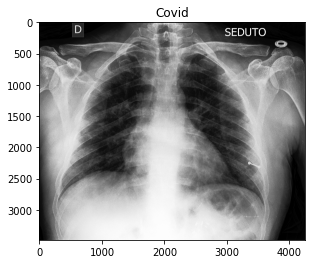

In [49]:
img = plt.imread(os.path.join(train_path, "Covid/01.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Covid')
print("size of image (h x w)",height,width)

EfficientNet

SENet

Inception and Xception

ResNet

VGGNet

AlexNet

LeNet-5

Scaling the Data:

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [53]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

Transfer Learning for Image Classification: 

Transfer learning will save time and resources while training a Neural Network i.e parameters and weights.

In [58]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np
from glob import glob
#from matplotlib.pyplot import plt

In [100]:
from keras_preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
train_dataset = train.flow_from_directory(train_path,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'categorical',shuffle=True)
test = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
test_dataset = train.flow_from_directory(test_path,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'categorical',shuffle=True)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [101]:
IMAGE_SIZE=[150,150]

In [102]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)


In [103]:
for layer in vgg.layers:
  layer.trainable=False


In [104]:
X= model.get_layer('block3_pool').output
X=Flatten()(vgg.output)
#output layer is condensed into 1D
prediction=Dense(3,activation='softmax',input_shape=(150, 150, 3))(X)
# We have 3 folders so we need ouput layer with 3 neurons
model=Model(vgg.input,outputs=prediction)
#input in 'model' is the input coming from the vgg model and output is the prediction being created
model.summary()
vgg.input.shape


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

TensorShape([None, 150, 150, 3])

In [105]:
from keras import optimizers
adam=tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [106]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint(filepath='mymodel.h5',verbose=2,save_best_only=True)
#Save only the best model
callbacks=[checkpoint]

In [107]:
model.history=model.fit_generator(train_dataset,
                                  epochs=10,
                                  steps_per_epoch=5,validation_data=test_dataset,
                                  validation_steps=32,
                                  callbacks=callbacks,
                                  verbose=2
                                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10

Epoch 1: val_loss improved from inf to 0.55994, saving model to mymodel.h5
5/5 - 61s - loss: 0.6227 - accuracy: 0.4323 - val_loss: 0.5599 - val_accuracy: 0.4394 - 61s/epoch - 12s/step
Epoch 2/10
5/5 - 43s - loss: 0.4589 - accuracy: 0.7563 - 43s/epoch - 9s/step
Epoch 3/10
5/5 - 41s - loss: 0.3554 - accuracy: 0.8516 - 41s/epoch - 8s/step
Epoch 4/10
5/5 - 42s - loss: 0.2938 - accuracy: 0.8581 - 42s/epoch - 8s/step
Epoch 5/10
5/5 - 41s - loss: 0.2468 - accuracy: 0.8710 - 41s/epoch - 8s/step
Epoch 6/10
5/5 - 41s - loss: 0.2382 - accuracy: 0.8839 - 41s/epoch - 8s/step
Epoch 7/10
5/5 - 41s - loss: 0.1868 - accuracy: 0.9419 - 41s/epoch - 8s/step
Epoch 8/10
5/5 - 43s - loss: 0.1867 - accuracy: 0.9187 - 43s/epoch - 9s/step
Epoch 9/10
5/5 - 41s - loss: 0.1998 - accuracy: 0.9161 - 41s/epoch - 8s/step
Epoch 10/10
5/5 - 42s - loss: 0.1748 - accuracy: 0.9250 - 42s/epoch - 8s/step


In [116]:
hist=(model.history).history
hist

{'accuracy': [0.43225806951522827,
  0.7562500238418579,
  0.85161292552948,
  0.8580645322799683,
  0.8709677457809448,
  0.8838709592819214,
  0.9419354796409607,
  0.918749988079071,
  0.9161290526390076,
  0.925000011920929],
 'loss': [0.6226762533187866,
  0.45890718698501587,
  0.35535722970962524,
  0.293836772441864,
  0.24681352078914642,
  0.23816139996051788,
  0.18680720031261444,
  0.18669430911540985,
  0.19981266558170319,
  0.17476774752140045],
 'val_accuracy': [0.43939393758773804],
 'val_loss': [0.5599385499954224]}

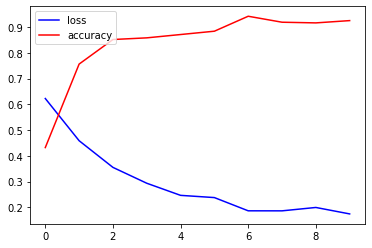

In [118]:
fig=plt.figure()
plt.plot(hist['loss'],color='blue',label='loss')
plt.plot(hist['accuracy'],color='red',label='accuracy')
plt.legend(loc='upper left')
plt.show()

In [119]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre=Precision()
re=Recall()
acc=BinaryAccuracy()
len(test_dataset)

3

https://www.itnonline.com/content/how-does-covid-19-appear-lungs

https://journal.chestnet.org/article/S0012-3692(16)60778-X/fulltext

https://www.sciencephoto.com/media/1107317/view/healthy-lungs-x-ray

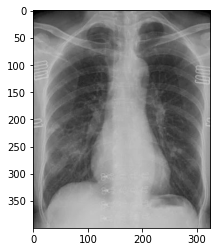

In [139]:
import cv2
img=cv2.imread('/content/ChestCOVID19.jpg')
plt.imshow(img)
plt.show()



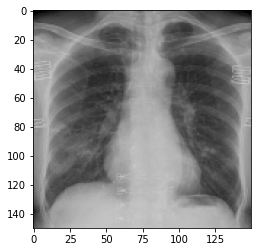

In [126]:
resize=tf.image.resize(img,(150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [128]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

array([[0.9902265 , 0.00606909, 0.00370438]], dtype=float32)

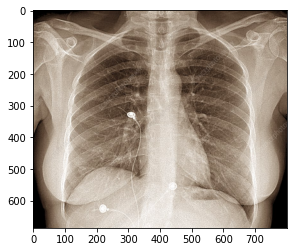

In [146]:
img2=cv2.imread('/content/HealthyLungs.jpeg')
plt.imshow(img2)
plt.show()

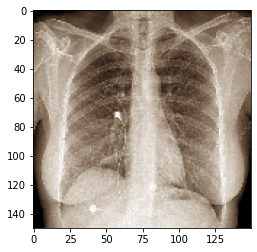

In [147]:
resize=tf.image.resize(img2,(150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [148]:
yhat1=model.predict(np.expand_dims(resize/255,0))
yhat1

array([[0.47571072, 0.5227542 , 0.00153503]], dtype=float32)

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

We can say that the nn has predicted with a high probability that the lung scan belongs to someone effected by COVID 19. 

The secong image is of a normal lung and the probability is higher in the second category which corresponds to normal lungs. Though we would like the probability to be more higher and accurate for the normal lung prediction it is not too bad either.